In [5]:
%matplotlib inline
#format the book
import book_format
book_format.set_style()

# 简介
上一章节中,我们讲的内容非常重要,但是它只能用于一维数据处理.加入我们现在想同时考虑位置和速度的变化,前面的做法就失效了. 本章我们就来学习如何对多维数据进行融合

# 多元正态分布

我们前面讲的正态分布其实都是单元的正态分布,这里我们要讲多元正态分布,也就是多个元素. 例如我们现在想要跟踪小车的x,y坐标,速度,加速度等4个维度的数据.同时考虑4个维度的数据可能有点复杂,那么我们还是先化繁为简,先只来学习2个维度的数据吧.

我们希望追踪小车x,y的位置信息,那么我们先令$x = 2 , y = 17$,我们可以写出下面的式子:
$$\mu = \begin{bmatrix}2\\17 \end{bmatrix}$$

$x$和$y$是单独的数据,上面的均值是2维,那么我们的方差也应该是2维,我们令$x$的方差为10,$y$的方差为4, 我们可以得出下面方差的公式:
$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$

至此,我们就完成了这种多元正态分布的假设.
经过前面章节的学习,我们知道如果一个班所有学生的身高都相同,那么方差为0,如果一个班的学生身高差异很大,那么方差就会很大.

现在我们想同时考虑身高和体重.通常情况下,个子高的同学体重要大于个子矮的同学. 身高和体重之间存在某种相关性. 我们希望用方差来表示身高,体重,以及身高和体重之间的相关性. 这就是协方差要干的事情.

# 协方差Covariance
协方差描述的是多个数据之间的相关性(Covariance:correlated variances). 换句话说,方差描述的是单个数据的变化程度,而协方差描述的是多个数据的变化程度.


| 球员     | 身高 | 体重 | 年龄 |
| -------- | ---- | ---- | ---- |
| 瓦尔迪   | 179  | 74   | 33   |
| 奥巴梅杨 | 187  | 80   | 31   |
| 梅西     | 170  | 72   | 33   |
| 本泽马   | 185  | 81   | 32   |
| 杰拉德   | 177  | 75   | 28   |
| C罗      | 187  | 83   | 35   |
| 卢卡库   | 190  | 94   | 27   |
| 姆巴佩   | 178  | 73   | 21   |
| 均值     | 181.5     |  79    |  30    |

例如上面这有一组数据描述各个球员的身高,体重,年龄. 我们发现上面这些数据之间其实是有相关性的. 例如身高越高,体重越大,身高越矮,体重越小,我们可以说身高和体重它们是正相关的.如果身高越高,体重越轻,我们可以称他们为负相关.
我们再来看身高和年龄,或者体重和年龄, 我们发现他们之间似乎是相对独立的,我们可以说它们之间没有相关性.

协方差也是可以用来做一些预测的. 假如你的身高比我高,我可以预测你的体重也比我大. 假如夏天天气太热了,我预测我家的空调要调的的更低. 假设狗狗朝我不停的摇尾巴, 我并不能预测今晚股票是否会大涨,因为狗摇尾巴与股市涨跌没有相关性.

下面我们就用图标的形式来描述一下这些球员的信息

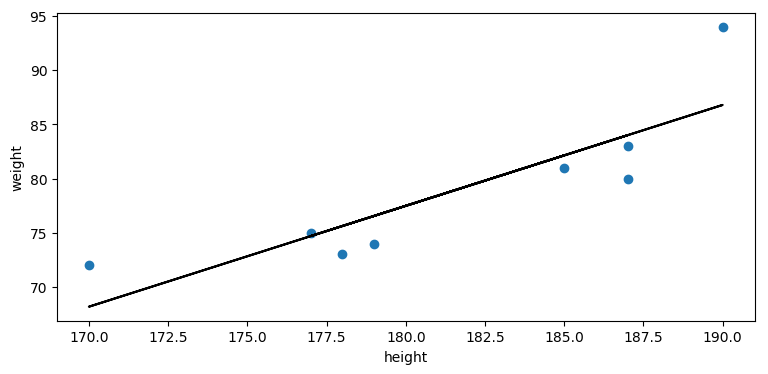

In [6]:
from kf_book.gaussian_internal import plot_correlated_data
height = [179,187,170,185,177,187,190,178]
weight = [74,80,72,81,75,83,94,73]
age = [33,31,33,32,28,35,27,21,30]


plot_correlated_data(height, weight, 'height', 'weight', False)

根据上面这个表,我们其实可以预测如果你的身高为185cm,那么你的体重可能是82公斤.当然这个预测并不是非常准确,因为当前我们的数据样本比较少.

在本章中,我们考虑的都是线性相关性,我们认为数据之间的相关性是线性相关. 在上面的例子中我们就用身高和体重的数据,拟合出一条直线关系.


下面两个数据$X,Y$的协方差计算公式:
$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

其中$\mathbb E[X]$ 表示的是数列X的期望

如果每个数据出现的概率都相同的话,那么它的期望为:
$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$

下面我们来对比一下方差和协方差的公式,他们看起来其实非常相似:

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

如果你想计算$COV(X, X)$ ,其实你计算的就是$VAR(X)$


我们多元正态分布的协方差,我们通常用矩阵的形式表示:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

我们假设x的方差为10,y的方差为4, 并且x与y之间没有相关性,则协方差为:
$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

若x与y正相关,则:
$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

若x与y负相关,则:
$$\Sigma = \begin{bmatrix}10&-1.2\\-1.2&4\end{bmatrix}$$

注意: 这里的 $\pm1.2$ 是我假设的值,我仅仅只是用 $\pm$ 来表示正负相关性

接下来让我们回顾一下,方差的计算公式,我们用一组简单的数据$ H=[1.8,2.0, 1.7, 1.9, 1.6] $ 表示身高,它的方差就等于:
$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$

方差的计算没有难度,我们再假设体重$W = [70.1, 91.2, 59.5, 93.2, 53.5]$, 我们可以用协方差矩阵来表示身高和体重:
$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

在协方差矩阵中,左上角元素表示的身高的方差,右下角表示的是体重的方差. 接下来我们把体重的方差也计算出来:

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$

运用前面我们所讲的协方差求解公式,我们可以算出:

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$

上面这个是我们手工推算出来的过程,numpy中已经提供好了相应的工具包, 接下来我们就用代码来计算一下协方差:

In [7]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

这里我们有一个疑问,用numpy计算出来的协方差为2.727, 而我们上面用手工计算的结果为2.18 . 这是因为numpy中的计算用$\frac{1}{N-1}$ 代替了上面公式的$\frac{1}{N}$ . 

为什么要这样处理呢? 假设学校里面总共有1000个学生, 如果我们把所有的学生的身高全都测量一遍,毫无疑问这里我们应该用$\frac{1}{N}$ ,但是这个在有些情况下其实难以实现,例如我们上面只从1000个学生中取了5个作为样本, 我们希望用这5个学生的数据来描述1000个学生的身高状况,这个过程本身就存在有偏差. 所以通常我们用小样本去描述大样本状况的时候, 我们通常用$\frac{1}{N-1}$  代替 $\frac{1}{N}$ 来表示, numpy默认就是这样的策略.如果仍然想用 $\frac{1}{N}$ 计算,我们只需要指定*bias=1*

In [8]:
np.cov(H,W,bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

这个结果和我们前面手工计算是一致的. 在后面的学习过程中,我们不会再使用*bias=1*, 因为我们要计算的位置信息是无穷数列,我们不可能拿到所有的样本数据,我们拿到的仅仅是其中的一部分数据.

上面的这个协方差矩阵,告诉了我们什么信息呢 ?

0.02是身高的方差,271.788是体重的方差,这两个数据说明样本中身高变化幅度很小,而体重变化幅度比较大.
2.182是一个正值,说明身高和体重是正相关,身高越高,体重越大.

为了加升大家协方差的理解,我们来创建两个相同的数列

In [9]:
X = np.linspace(1,10,100)
Y = np.linspace(1,10,100)

np.cov(X,Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

正如我们前面所讲的,如果两个数列它们是相等的,那么它的协方差就等于它们的方差.下面我们用一些图表来更加直观的理解一下协方差.

我们首先定义一个画图的工具函数

array([[ 9.167, -3.999],
       [-3.999,  1.765]])

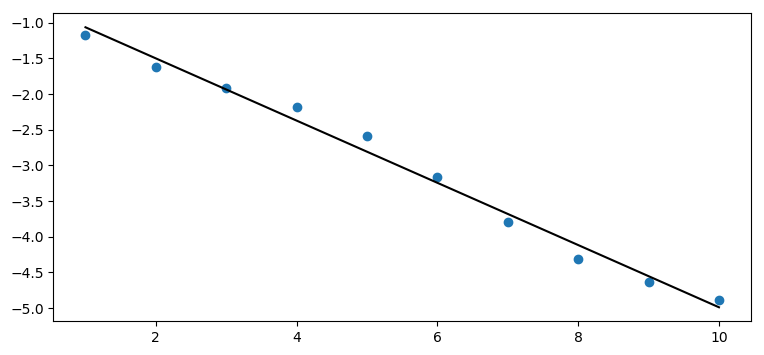

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def plot_correlated(X,Y):
    plt.scatter(X, Y)
    
    # 拟合出一条直线
    k,b = np.polyfit(X, Y, 1)
    # 绘制直线
    plt.plot(X,k*X + b,color="k")
    
X = np.linspace(1, 10, 10)
Y = -(np.linspace(1, 5, 10) + np.sin(X)*0.2)  

plot_correlated(X,Y)

np.cov(X,Y)

我们可以看到x的数据变化范围为$\left(1,10\right)$,所以它的方差较大. Y的数据变化范围为$\left(1,5\right)$,所以它的方差较小  
我们再来看协方差,协方差为负数,表示X越大,Y值越小. 其中3.999并没有接近0 ,所以我们认为X,Y数据存在一定程度的相关性.

下面我们再来看集中更加复杂的情况.

我们先对数据增加一定的随机噪声,看看它们的表现形式


array([[11.073,  3.298],
       [ 3.298,  2.31 ]])

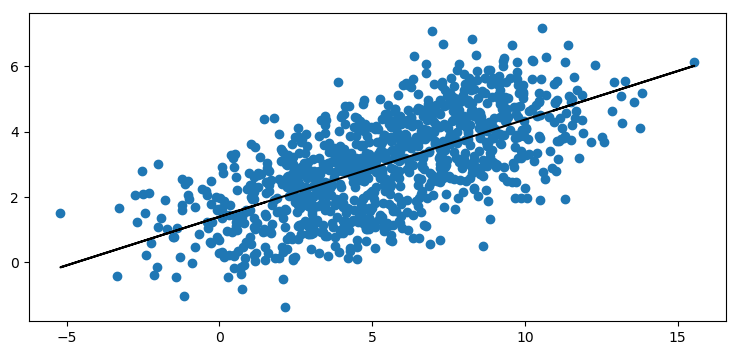

In [11]:
from numpy.random import randn
X = np.linspace(1,10,1000) + randn(1000)*2
Y = np.linspace(1,5,1000) + randn(1000)

plot_correlated(X,Y)

np.cov(X,Y)

我们可以看到当前X,Y数据波动非常它,然后我们发现数据的协方差变小了,说明X和Y相关性在变小

最后我们再来看一组X,Y都是完全随机数的情况

array([[0.998, 0.004],
       [0.004, 1.002]])

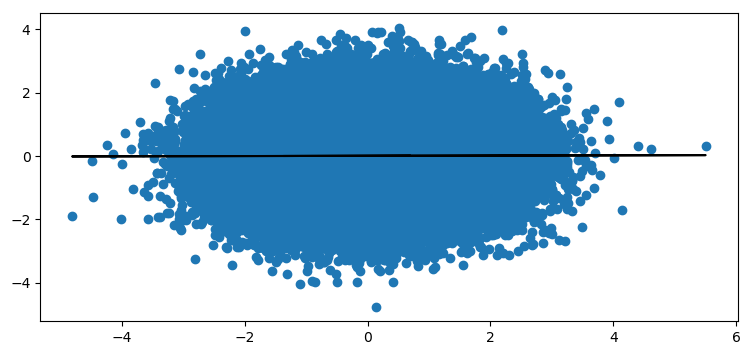

In [12]:
X = randn(100000)
Y = randn(100000)

plot_correlated(X,Y)
np.cov(X,Y)

我们可以看到协方差0.004已经非常接近于0了,这说明X,Y之间没有很明显的相关性.

# 多元正态分布方程

我们首先来回顾一下我们之前的学习过的一元正态分布方程:
$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$

下面这个是N维多元正态分布的公式:
$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

这个公式看起来可能有点吓人,其实它仅仅只是用矩阵代替了单一的变量,如果你对线性代数比较熟悉的话,这个应该看容易看懂. 如果看不懂,也没有关系,我们可以使用一些工具把图像先绘制出来看一下.

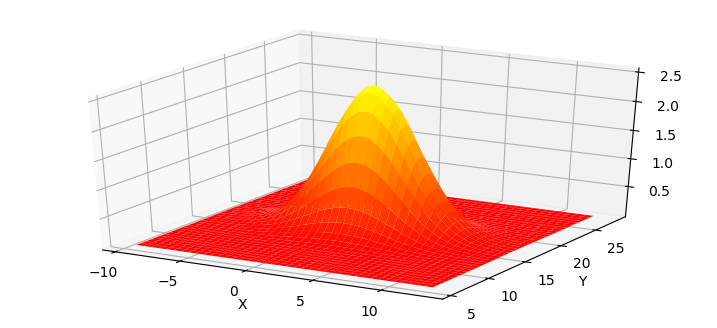

In [13]:
import kf_book.mkf_internal as mkf_internal

mean = [2.,17]
cov = [[10.,0],
       [0.,4]]

mkf_internal.plot_3d_covariance(mean, cov)

图像中最高点的位置,就是X,Y均值的位置,越靠近顶端,概率密度越高. FilterPy中已经实现了这种多元正态分布的计算.在filterpy.stats中调用`multivariate_gaussian()` 可以进行运算.

接下来,我们就通过实例来演示一下如何使用它来计算概率密度. 

假设我们想计算小车在`(2.5,7.3)`的概率密度,我们确信小车在`(2,7)`位置,x的方差为8,y的方差为3

In [14]:
from filterpy.stats import gaussian,multivariate_gaussian

x = [2.5,7.3]
# 我们设置均值
mu = [2.0,7.0]

为了进行多元正态分布的计算,我们还得定义协方差矩阵,在上面的问题中,我们并没有指定x和y的相关性,它们之间是独立的不会产生相互影响.所以x,y的协方差可以设置为0.  
在卡尔曼滤波中通常用P来表示协方差,所以下面我们用P来定义协方差矩阵

In [15]:
P = [[8,0],
     [0.,3]]

现在我们来计算一下它的概率密度

In [16]:
multivariate_gaussian(x,mu,P)

0.031507521572225645

如果我们将从俯视的角度来查看我们多元高斯分布的话,我们可以得出如下图像:

![](./itheima/img/eli.png)

正如大家所看到的一样,x方向的方差较大,y方向的方差较小,所以我们看到的图像就是一个椭圆形. 通常协方差的图像我们正是用这种椭圆形来表示,下面我们再来给大家看几种协方差的情况

![](./itheima/img/cov.png)
仔细观察上面这三张图片
1. 当x,y方差相等,协方差为0, x,y的变化幅度相同,图像是个圆形
2. 当y的方差较大,协方差为0,那数据在y方向的变化幅度较大,图像是个椭圆
3. 当x,y的方向差相同,协方差为正数,x,y成正相关
下面我们用动态图来描述一下协方差的变化,数据的变化
![](./itheima/img/multivariate_ellipse.gif)

接下来,我们用filterpy工具来绘制这些椭圆,观察他们的变化

In [17]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

height = [179,187,170,185,177,187,190,178]
weight = [74,80,72,81,75,83,94,73]
age = [33,31,33,32,28,35,27,21,30]
# 我们假设我们计算的是整个数据,而不是其中的一部分,所以我们设定bias=1,表示数据无偏差
cov_hw = np.cov(np.vstack((height,weight)),bias=1) 
cov_hw

array([[39.484, 36.75 ],
       [36.75 , 46.5  ]])

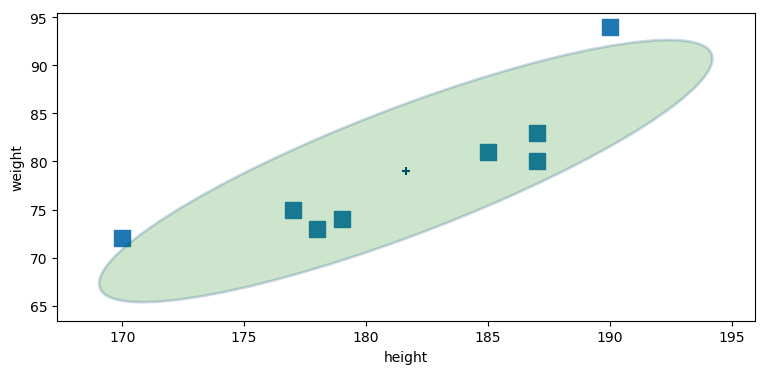

In [18]:
plt.scatter(height,weight,s=120,marker="s")
plt.xlabel("height")
plt.ylabel("weight")

mean = [np.mean(height),np.mean(weight)]
plot_covariance_ellipse(mean,cov_hw,fc="g",alpha=0.2,axis_equal=False,std=2)

用这种图像,可以让我们更直观的来理解协方差.协方差椭圆展示出数据的相关性.一个非常窄的椭圆,说明数据相关性很高.  
椭圆的方向,指向了右上角,说明随着身高的增大,体重也会增大,身高和体重是正相关  
椭圆的方向若是指向右下角,则说明数据负相关  

下面我们来绘制一个负相关的例子,发动机能承受的最高温度越高,则发动机的寿命越短.

array([[14000.  ,  -395.  ],
       [ -395.  ,    13.23]])

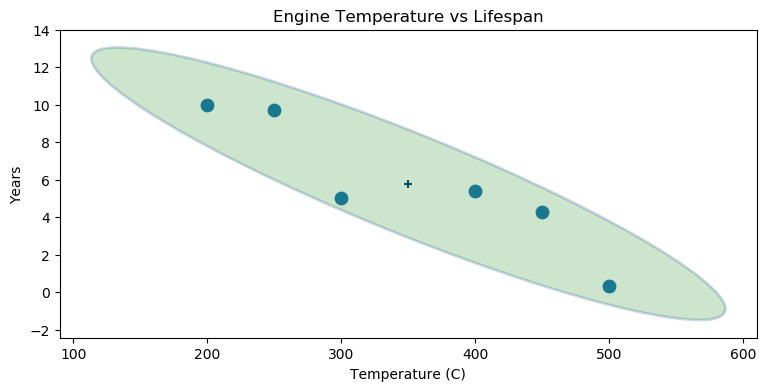

In [19]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

cov

# 用相关性来提升估计值
假设小车x,y的标准差都为2,并且它们具有很强的相关性,那么我们可以来猜想小车在(5,10)这个位置的协方差椭圆的样子

Text(0, 0.5, 'Y')

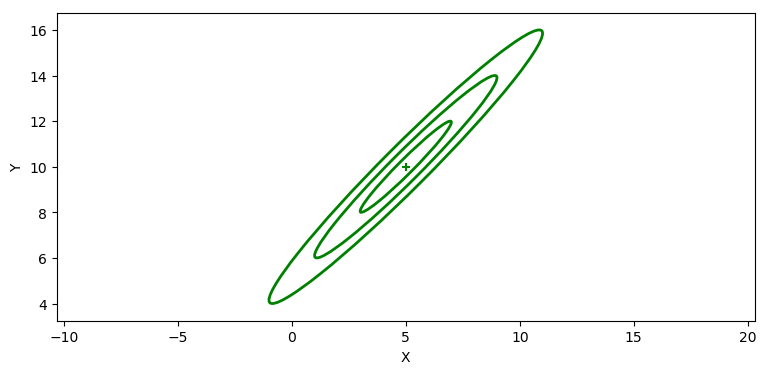

In [20]:
P = [[4,3.9],
     [3.9,4]]

plot_covariance_ellipse((5,10),P,ec='g',std=[1,2,3])
plt.xlabel("X")
plt.ylabel("Y")

接下来,我们来猜一下,假设我告诉你x=7.5 ,那么y的可能值为多少? 
根据我们前面学过的**68-95-99.7法则**, 数据最优可能在$3\sigma$ 协方差椭圆内,在下图我们用蓝色的圆形绘制出了,y可能出现的位置

![](./itheima/img/tu1.png)

通过上面这个图,我们可以说小车y坐标在12的附近概率比较大

# 多维高斯乘法
在前面章节中,我们将一个不太准确的测量值和一个不太准确的预测值融合在了一起,它们输出了一个方差更小的高斯分布. 如果两条不太确定的信息,相互印证,我们就能提升结果的去准确性.

就像我们前面做的高斯乘法一样:
![](./itheima/img/tu2.png)

融合两次测量,输出的方差变小,高斯图像又高又瘦,我们更加相信两次测量融合之后的结果. 
对于多维高斯分布,我们同样可以用这种方式.

这里我们给出多维高斯分布的乘法公式:
$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$

为了让大家能有个直观的认识,我们再来回顾一下一维的高斯函数乘法:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$


通过上面两组公式,现在大家对一维和多维的高斯函数应该有一个非常直观的认识了吧!
为了便于大家理解,那我可以暂时讲多维的高斯公式写成如下形式:

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$
至此,大家对一维和多维的形式更加清晰了吧!


接下来,我们继续来学习多维高斯.假设我们现在正在跟踪一台小车的位置, 我用北斗定位,出来它的坐标为(10,10),北斗定位在X,Y方向上的测量相互独立互不影响,X,Y方向上的方差都为10,我们可以绘制如下图形:

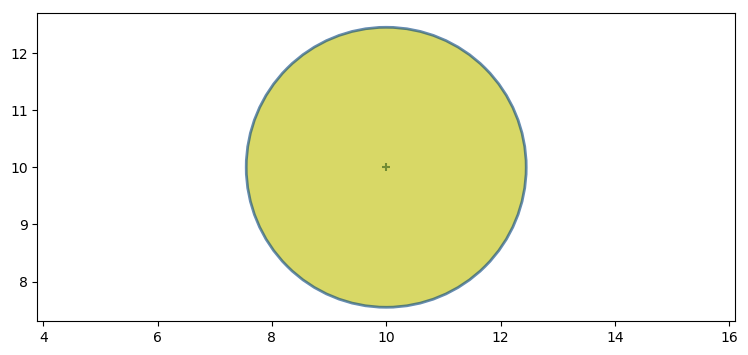

In [21]:
P0 = [[6,0],[0,6]]
plot_covariance_ellipse((10,10),P0,fc="y", alpha=0.6)

现在我们用GPS定位系统测出小车的位置也是(10,10),它在X,Y方向上的方差都为2,并且X,Y存在相关性,X,Y的协方差为1.9. 根据这样一种情形,我们可以绘制出如下图形:

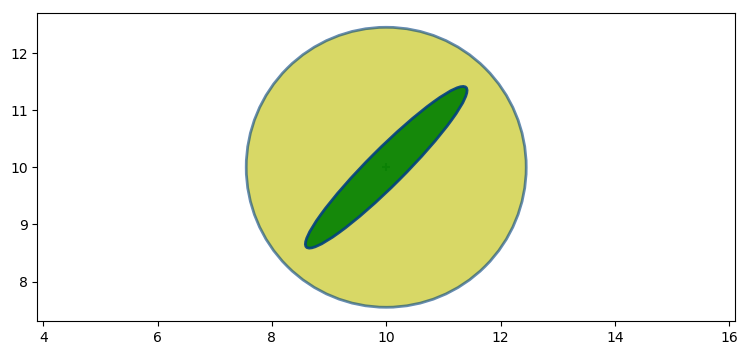

In [22]:
P1 = [[2,1.9],
      [1.9,2]]

plot_covariance_ellipse((10,10),P0,fc="y",alpha=0.6)
plot_covariance_ellipse((10,10),P1,fc="g",alpha=0.9)

假设我们现在想将北斗定位和GPS定位的数据相结合,那又改怎么做呢? 答案很简单,类似我们之间一维高斯模型的乘法一样,我们将两个多维高斯模型相乘,将会输出一个新的结果,这个新的结果,必定在两个结果之间,并且准确度要高.

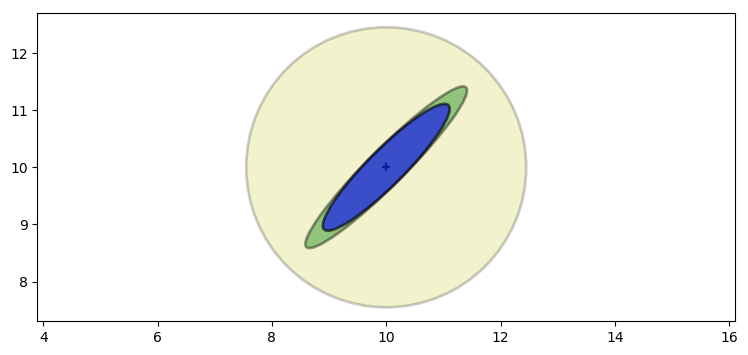

In [23]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10,10),P0,(10,10),P1)[1]

plot_covariance_ellipse((10,10),P0,ec="k",fc="y",alpha=0.2)
plot_covariance_ellipse((10,10),P1,ec="k",fc="g",alpha=0.4)
plot_covariance_ellipse((10,10),P2,ec="k",fc="b",alpha=0.6)

从上面的结果我们可以看出,黄色表示北斗的测量结果,绿色表示GPS的测量结果,我们将两个结果相乘,范围变小了,我们对测量的结果更加确信了.  
它和我们之前在一维高斯模型中看到的结果类似.

下面我们可以再将上面融合的结果,与其它的测量结果进行融合:

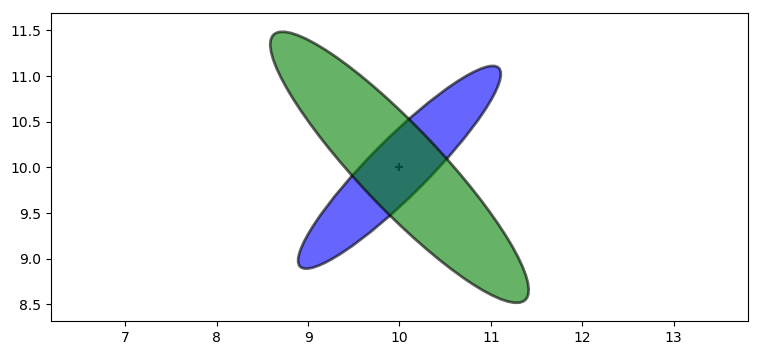

In [24]:
P3 = [[2,-1.9],
      [-1.9,2.2]]

plot_covariance_ellipse((10, 10), P2, ec='k', fc='b', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

我们将将上面两个协方差进行相乘,randn后再输出结果看看:

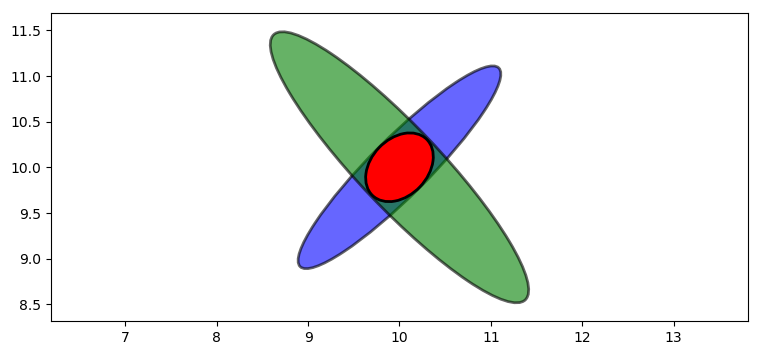

In [25]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='r')

在上图中,两个椭圆相交的红色区域就是两个高斯模型相乘得出的新的高斯模型.它让我们的估计值更加精确啦!

在前面的案例中,我们为了让大家更容易理解,所以我们假定两次测量的结果都为(10,10),这是一种非常理想的状态.现在我们尝试调整上面的参数,让两次的测量结果不一致,看看最终输出的结果又是怎样的.

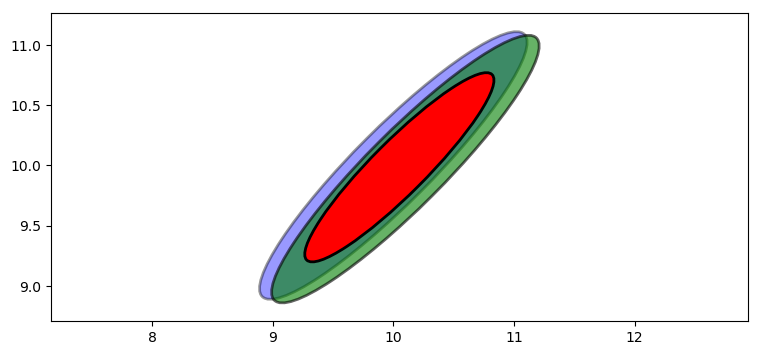

In [26]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b', alpha=0.4)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='r')

本章我们主要给大家讲了一下多维高斯模型的融合,在下一章节中,我们将会给大家讲解如何利用本章学习的内容,来设计多维的卡尔曼滤波